
Project Completed:)

#HIGH SECURITY SYSTEM

Cryptography(AES) and Steganogaphy Combination Project

Very Unique, New and Interesting Project

In [6]:
pip install pycrypto


In [7]:
import hashlib
import math
import os

from Crypto.Cipher import AES

In [8]:
pip install pyaes

In [4]:
pip install pbkdf2

  Preparing metadata (setup.py) ... done
  Created wheel for pbkdf2: filename=pbkdf2-1.3-py3-none-any.whl size=5083 sha256=5959ee75e8f0433da59c4e858bdbdfa2d4dfb11606fa5ff362633d87885885cd
  Stored in directory: /root/.cache/pip/wheels/f6/7d/8b/4269ff90fda80497ec59f6ff7d1e1596cb697c1dc8e9bbe320
Successfully built pbkdf2


In [5]:
import pyaes, pbkdf2, binascii, os, secrets

# Derive a 256-bit AES encryption key from the password
password = "s3cr3t*c0d3"
passwordSalt = os.urandom(16)
key = pbkdf2.PBKDF2(password, passwordSalt).read(32)
print('AES encryption key:', binascii.hexlify(key))

AES encryption key: b'cfb88648c3f4f9f90c55d9741c0d2d373a67ec5d06ec0dbafa20513c08563ec1'


In [9]:
# Encrypt the plaintext with the given key:
#   ciphertext = AES-256-CTR-Encrypt(plaintext, key, iv)
iv = secrets.randbits(256)
plaintext = "bomb in car"
aes = pyaes.AESModeOfOperationCTR(key, pyaes.Counter(iv))
ciphertext = aes.encrypt(plaintext)
print('Encrypted:', binascii.hexlify(ciphertext))

Encrypted: b'6033716825f0fe1fbe41ef'


In [10]:
# Decrypt the ciphertext with the given key:
#   plaintext = AES-256-CTR-Decrypt(ciphertext, key, iv)
aes = pyaes.AESModeOfOperationCTR(key, pyaes.Counter(iv))
decrypted = aes.decrypt(ciphertext)
print('Decrypted:', decrypted)

Decrypted: b'bomb in car'


In [11]:
from PIL import Image
import numpy as np

In [12]:
#Steganograpahy
def encode_text(text, encoding='utf-8', errors='surrogatepass'):
    bits = bin(int.from_bytes(text.encode(encoding, errors), 'big'))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))

def decode_text(bits, encoding='utf-8', errors='surrogatepass'):
    n = int(bits, 2)
    return n.to_bytes((n.bit_length() + 7) // 8, 'big').decode(encoding, errors) or '\0'


hidden_message = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua."

encoded_text = encode_text(hidden_message)
decoded_text = decode_text(encoded_text)

print("encoded:", encoded_text)
print("decoded:", decoded_text)

encoded: 010011000110111101110010011001010110110100100000011010010111000001110011011101010110110100100000011001000110111101101100011011110111001000100000011100110110100101110100001000000110000101101101011001010111010000101100001000000110001101101111011011100111001101100101011000110111010001100101011101000111010101110010001000000110000101100100011010010111000001101001011100110110001101101001011011100110011100100000011001010110110001101001011101000010110000100000011100110110010101100100001000000110010001101111001000000110010101101001011101010111001101101101011011110110010000100000011101000110010101101101011100000110111101110010001000000110100101101110011000110110100101100100011010010110010001110101011011100111010000100000011101010111010000100000011011000110000101100010011011110111001001100101001000000110010101110100001000000110010001101111011011000110111101110010011001010010000001101101011000010110011101101110011000010010000001100001011011000110100101110001011101010110000100101110
decode

In [13]:
# Download and upload Image : https://freepngimg.com/thumb/car/4-2-car-png-hd.png

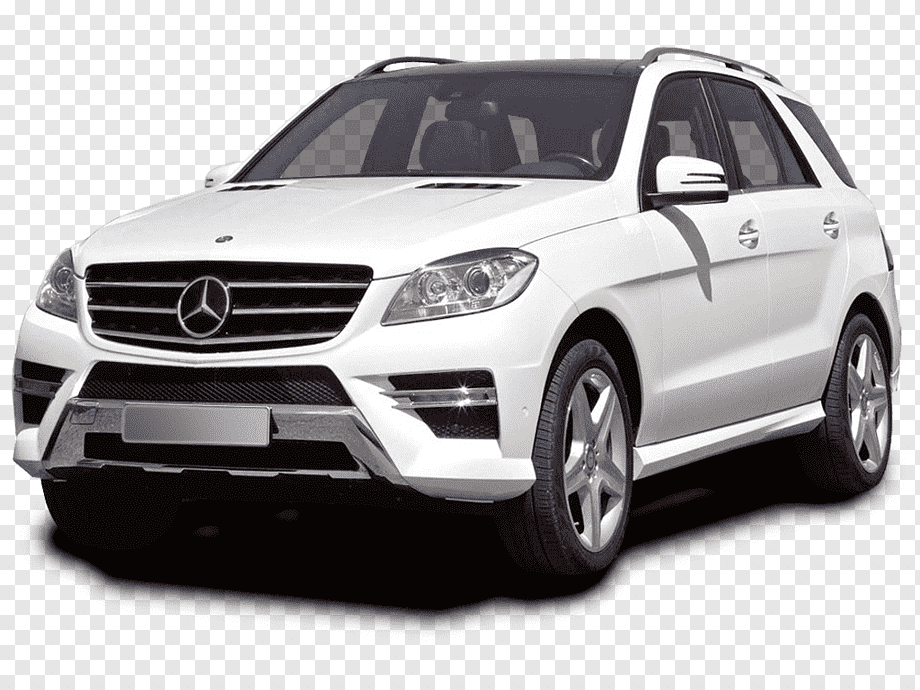

In [15]:
#Steganography Encryption
def encode_in_image(filename, text_message):
    # Open the image, store the shape and convert to one-dimensional list
    input_im = Image.open(filename, 'r').convert("RGB")
    image_shape = np.asarray(input_im).shape
    flat_array = np.asarray(input_im).flatten()

    # Encode the message and add prefix
    encoded_text = encode_text(text_message + "<STOP>")

    # Enter message in the least significant bit where necessary
    encoded_array = [
        (0b11111110 & value) | int(encode_bit) if ix < len(encoded_text) else value
        for ix, (encode_bit, value) in enumerate(zip(encoded_text.ljust(len(flat_array), '0'), flat_array))]

    # Turn encoded array into image and return
    encoded_im = np.array(encoded_array).reshape(image_shape)
    return Image.fromarray(np.uint8(encoded_im)).convert('RGB')





# Input as Image and Secret Message Should be Given.
encoded_im = encode_in_image('car.png', "bomb in car")
encoded_im.save('i.png')
encoded_im

In [16]:
#Steganography Decryption
def extract_from_image(filename):
    # Open image
    encoded_im = np.asarray(Image.open(filename, 'r').convert("RGB"))

    # Extract least significant bits from flat (one-dimensional) image
    extracted_bits = [str(0b00000001 & value) for value in encoded_im.flatten()]

    # Join bits together, decode and split at <STOP>
    extracted_bits = ''.join(extracted_bits)
    return decode_text(extracted_bits, errors='replace').split('<STOP>')[0]

extract_from_image('i.png')

'bomb in car'